## An OMOP Cohort: Patients Exposed to Amiodarone Hydrochloride > 30 Days

### Part III: Exploring the Longitudinal Data

An examination of de-identified longitudinal visit and procedure data (derived to OMOP from Medicare DeSYNPuf data, 2008-2010, by OHDSI) and associated ICD9CM diagnosis codes to analyze the incidence and prevalence of AEs associated with amiodarone toxicity to the lung, thyroid and liver.

Kyle P. Rasku MS BSN RN

In [1]:
%matplotlib inline
import random
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
condition_visits_ds = pd.read_csv("conditions_visits_procedures.csv", parse_dates=["treatment_start", "vstart"])
condition_visits_ds.head()

,patient_id,treatment_start,treatment_period,visit_id,vstart,vprovider,care_site,diagnosis_1,diagnosis_2,diagnosis_3,...,pdesc_16,sentinel_condition_code,sentinel_condition_name,sentinel_snomed_name,sentinel_condition_type,sentinel_snomed_code,condition_start_date,condition_end_date,condition_interval_days,treatment_condition_interval_days
0,111598,2008-01-15,90,5351372,2008-01-28,50058.0,11234.0,Vomiting,Epidemic vertigo,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,111598,2008-01-15,90,5351385,2008-01-28,315573.0,11283.0,Atrial fibrillation,Paroxysmal supraventricular tachycardia,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,111598,2008-01-15,90,5351386,2008-01-31,218450.0,11234.0,Atrial fibrillation,Premature beats,Type 2 diabetes mellitus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,111598,2008-01-15,90,5351403,2008-02-05,382137.0,28276.0,Angina decubitus,Mitral and aortic stenosis,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,111598,2008-01-15,90,5351324,2008-02-05,447710.0,11222.0,Conduction disorder of the heart,Atrial fibrillation,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
condition_visits_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5617 entries, 0 to 5616
Data columns (total 65 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   patient_id                         5617 non-null   int64         
 1   treatment_start                    5617 non-null   datetime64[ns]
 2   treatment_period                   5617 non-null   int64         
 3   visit_id                           5617 non-null   int64         
 4   vstart                             5617 non-null   datetime64[ns]
 5   vprovider                          5608 non-null   float64       
 6   care_site                          5612 non-null   float64       
 7   diagnosis_1                        5617 non-null   object        
 8   diagnosis_2                        4279 non-null   object        
 9   diagnosis_3                        2137 non-null   object        
 10  diagnosis_4                        1

In [4]:
sentinel_visits_ds = condition_visits_ds[["patient_id", "treatment_start", "treatment_period", "visit_id", "vstart", 
                                          "sentinel_condition_code", "sentinel_condition_name", "sentinel_snomed_name", 
                                          "sentinel_condition_type", "condition_start_date", "condition_end_date", 
                                          "condition_interval_days", "treatment_condition_interval_days"]].copy()

sentinel_visits_ds = sentinel_visits_ds[sentinel_visits_ds["condition_start_date"].notnull()]
sentinel_visits_ds.shape

(277, 13)

In [5]:
sentinel_visits_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 34 to 5613
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   patient_id                         277 non-null    int64         
 1   treatment_start                    277 non-null    datetime64[ns]
 2   treatment_period                   277 non-null    int64         
 3   visit_id                           277 non-null    int64         
 4   vstart                             277 non-null    datetime64[ns]
 5   sentinel_condition_code            277 non-null    float64       
 6   sentinel_condition_name            277 non-null    object        
 7   sentinel_snomed_name               277 non-null    object        
 8   sentinel_condition_type            277 non-null    object        
 9   condition_start_date               277 non-null    object        
 10  condition_end_date                 2

## The Impacted Patients

The cohort had 97 individuals (48%) who developed a lung, liver or thyroid-related illness following amiodarone exposure.


In [6]:
cohort_ds = pd.read_csv("amiodarone_exposed_patients.csv", parse_dates=["patient_dob"])
sentinel_cohort_visits_ds = pd.merge(sentinel_visits_ds, cohort_ds, on="patient_id", how="left")
sentinel_cohort_visits_ds.shape

(277, 19)

In [7]:
sentinel_cohort_visits_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 0 to 276
Data columns (total 19 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   patient_id                         277 non-null    int64         
 1   treatment_start                    277 non-null    datetime64[ns]
 2   treatment_period                   277 non-null    int64         
 3   visit_id                           277 non-null    int64         
 4   vstart                             277 non-null    datetime64[ns]
 5   sentinel_condition_code            277 non-null    float64       
 6   sentinel_condition_name            277 non-null    object        
 7   sentinel_snomed_name               277 non-null    object        
 8   sentinel_condition_type            277 non-null    object        
 9   condition_start_date               277 non-null    object        
 10  condition_end_date                 277

In [8]:
patient_visits_ds = sentinel_visits_ds.groupby("patient_id").count().reset_index()
patient_visits_ds = patient_visits_ds[["patient_id", "visit_id"]].copy()
patient_visits_ds.shape

(97, 2)

In [9]:
sentinel_patients = list(sentinel_visits_ds["patient_id"].unique())
sentinel_cohort_ds = cohort_ds[cohort_ds["patient_id"].isin(sentinel_patients)]
sentinel_cohort_ds.head()

,patient_id,gender,patient_dob,race,ethnicity,county,state
4,4549,Female,1933-11-01,White,Not Hispanic,15430,IN
7,5680,Female,1929-04-01,White,Not Hispanic,31150,NJ
8,5894,Male,1948-05-01,Black or African American,Not Hispanic,19250,LA
10,7134,Female,1964-12-01,White,Not Hispanic,10050,FL
11,7630,Female,1919-08-01,Black or African American,Not Hispanic,18550,KY


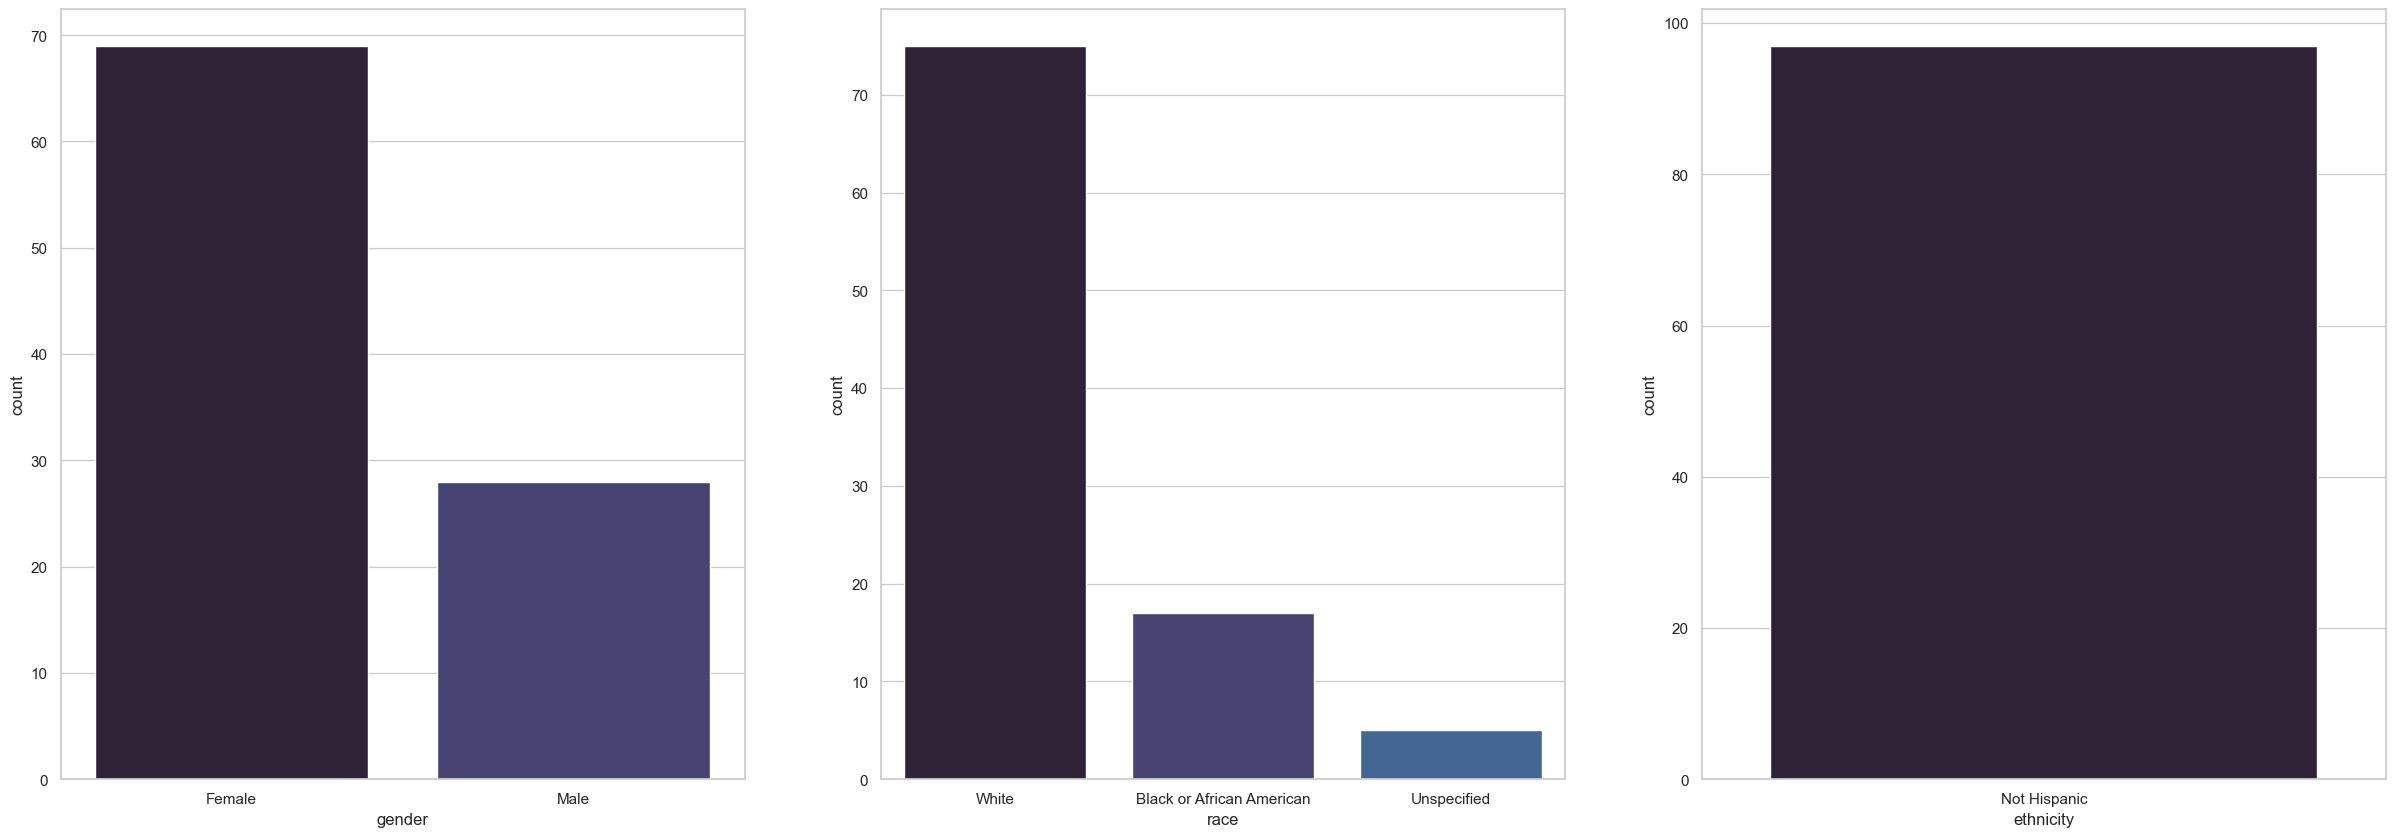

In [10]:
sb.set_theme(style="whitegrid", palette="mako")
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
sb.countplot(data=sentinel_cohort_ds, x="gender", ax=axes[0])
sb.countplot(data=sentinel_cohort_ds, x="race", ax=axes[1])
sb.countplot(data=sentinel_cohort_ds, x="ethnicity", ax=axes[2])
plt.show()

In [11]:
counts = sentinel_cohort_ds["gender"].value_counts()
percs = sentinel_cohort_ds["gender"].value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
Female,69,0.71134
Male,28,0.28866


While there were 63.5% females and 36.5% males in the exposure cohort, there are 71% females and 29% males in the impacted cohort.

In [12]:
counts = sentinel_cohort_ds["race"].value_counts()
percs = sentinel_cohort_ds["race"].value_counts(normalize=True)
pd.concat([counts,percs], axis=1, keys=['count', 'percentage'])

,count,percentage
White,75,0.773196
Black or African American,17,0.175258
Unspecified,5,0.051546


The exposure cohort was 80% white, much whiter than the total # of Americans on Medicare in 2010 (59% white).  The impacted cohort is 77% white, and 17.5% Black, indicating that proportionally more Black patients were impacted.  

100% of the impacted cohort were non-Hispanic, however the exposure cohort only had 3 Hispanic patients.

In [13]:
from datetime import date

def calculate_age(args):
    born, visit_date = args
    return visit_date.year - born.year - ((visit_date.month, visit_date.day) < (born.month, born.day))

# Example: df[['B', 'C']].apply(do_function, axis=1)
sentinel_cohort_visits_ds["age_at_visit"] = sentinel_cohort_visits_ds[["patient_dob", "vstart"]].apply(calculate_age, axis=1)

### Impacted Patient Ages at Sentinel Visits

Mean age at diagnosis, 77 years.

Median age at diagnosis, 80 years.

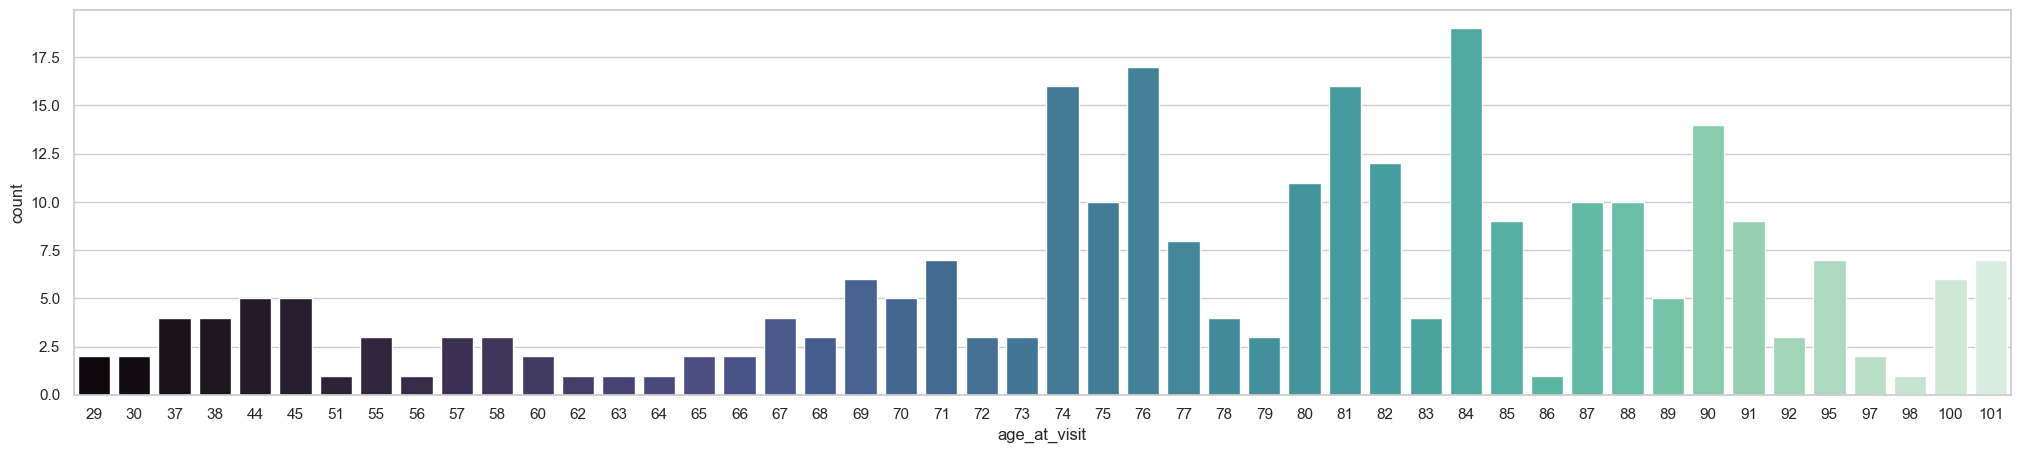

In [14]:
sb.set(rc={"figure.figsize":(25, 5)})
sb.set_theme(style="whitegrid")
sb.countplot(data=sentinel_cohort_visits_ds, x="age_at_visit", palette="mako");

In [28]:
desc = sentinel_cohort_visits_ds["age_at_visit"].describe()
desc_df = desc.to_frame().reset_index()
desc_df.columns=["statistic", "value"]
desc_df

,statistic,value
0,count,277.000000
1,mean,77.122744
2,std,14.905721
3,min,29.000000
4,25%,72.000000
5,50%,80.000000
6,75%,87.000000
7,max,101.000000


In [29]:
patients_by_state = sentinel_cohort_ds.groupby(["state"])["patient_id"].count()
patients_by_state = patients_by_state.reset_index()
patients_by_state.columns = ["state", "num_patients"]
patients_by_state.head()

,state,num_patients
0,AL,3
1,AR,2
2,AZ,3
3,CA,11
4,DC,1


In [30]:
sb.set_theme(style="whitegrid", palette="mako")
import plotly.express as px
from textwrap import wrap

named_colorscales = px.colors.named_colorscales()
#print("\n".join(wrap("".join('{:<12}'.format(c) for c in named_colorscales), 96)))

fig = px.choropleth(patients_by_state,  # Input Pandas DataFrame
                    locations = "state",  # DataFrame column with locations
                    color = "num_patients",  # DataFrame column with color values
                    color_continuous_scale = 'viridis',
                    hover_name = "state", # DataFrame column hover info
                    locationmode = 'USA-states') # Set to plot as US States
fig.update_layout(
    title_text = 'Impacted Patients by State', # Create a Title
    geo_scope ='usa',  # Plot only the USA instead of globe
)
fig.show()  

Impacted patient state proportions similar to the original exposure cohort.

## The Sentinel Condition Visits

277 visits document these diagnoses & conditions.

In [31]:
sentinel_visits_ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 277 entries, 34 to 5613
Data columns (total 13 columns):
 #   Column                             Non-Null Count  Dtype         
---  ------                             --------------  -----         
 0   patient_id                         277 non-null    int64         
 1   treatment_start                    277 non-null    datetime64[ns]
 2   treatment_period                   277 non-null    int64         
 3   visit_id                           277 non-null    int64         
 4   vstart                             277 non-null    datetime64[ns]
 5   sentinel_condition_code            277 non-null    float64       
 6   sentinel_condition_name            277 non-null    object        
 7   sentinel_snomed_name               277 non-null    object        
 8   sentinel_condition_type            277 non-null    object        
 9   condition_start_date               277 non-null    object        
 10  condition_end_date                 2

### Treatment Condition Interval Months

The # of days between amiodarone treatment start and the onset of the sentinel condition.

In [37]:
# df['duration'] = (df['end'] - df['start'])/np.timedelta64(1, 'M')
sentinel_visits_ds["treatment_condition_interval_months"] = (sentinel_visits_ds['vstart'] - sentinel_visits_ds['treatment_start'])/np.timedelta64(1, 'M')

In [38]:
tcid_desc = sentinel_visits_ds["treatment_condition_interval_months"].describe()
tcid_desc_df = tcid_desc.to_frame().reset_index()
tcid_desc_df.columns=["statistic", "value"]
tcid_desc_df

,statistic,value
0,count,277.000000
1,mean,10.045885
2,std,7.212709
3,min,0.032855
4,25%,4.139715
5,50%,8.377995
6,75%,14.784698
7,max,31.310705


In [40]:
import plotly.express as px

fig = px.histogram(sentinel_visits_ds, x="treatment_condition_interval_months")
fig.show()

The majority of patients who suffered a suspected lung, liver or thyroid complication did so within the first year of amiodarone treatment. A large # of these AEs occurred within the first 6 months.

### Sentinel Condition Diagnosis Type 



In [43]:
counts = sentinel_visits_ds["sentinel_condition_type"].value_counts()
percs = sentinel_visits_ds["sentinel_condition_type"].value_counts(normalize=True)
condition_counts = pd.concat([counts,percs], axis=1, keys=['count', 'percentage']).reset_index()
condition_counts.columns = ["Condition Type", "Diagnosis Count", "Diagnosis Percentage"]
fig = px.bar(condition_counts, x='Condition Type', y='Diagnosis Count', color='Condition Type')
fig.show()

In [44]:
condition_counts

,Condition Type,Diagnosis Count,Diagnosis Percentage
0,LUNG,251,0.906137
1,LIVER,16,0.057762
2,THYROID,10,0.036101


90.6% of all diagnoses were lung / breathing related diagnoses.

In [82]:
lung_visits = sentinel_visits_ds[sentinel_visits_ds["sentinel_condition_type"]=="LUNG"].copy()
lung_visits["sentinel_condition_code_str"] = lung_visits["sentinel_condition_code"].astype("str")
lung_visits["vstart_str"] = lung_visits["vstart"].dt.strftime(date_format='%m/%d/%Y').astype("str")


In [86]:
pt_lung_visits = lung_visits.groupby(['patient_id'], as_index = False).agg({'sentinel_condition_code_str': lambda x: ';'.join(set(x)), 
                                                                            'sentinel_condition_name': lambda x: ';'.join(set(x)),
                                                                            'visit_id': 'count',
                                                                            'vstart_str' : lambda x: ', '.join(set(x))
                                                                           })


In [88]:
long = {}
long[0] = pt_lung_visits['sentinel_condition_code_str'].str.split(pat=";", expand=True)
long[1] = pt_lung_visits['sentinel_condition_name'].str.split(pat=";",expand=True)
long[2] = pt_lung_visits['vstart_str']


pt_lung_visit_summary = pd.concat(long, axis=1)
pt_lung_visit_summary["visit_count"] = pt_lung_visits["visit_id"].copy()
pt_lung_visit_summary["patient_id"] = pt_lung_visits["patient_id"].copy()

pt_lung_visit_summary.columns = ["code_1", "code_2", "code_3", "code_4", 
                                 "diagnosis_1", "diagnosis_2", "diagnosis_3", "diagnosis_4", 
                                 "visit_dates", "visit_count", "patient_id"]

pt_lung_visit_summary = pt_lung_visit_summary.set_index("patient_id")

pt_lung_visit_summary.shape

(93, 10)

In [93]:
pt_lung_visit_summary

,code_1,code_2,code_3,code_4,diagnosis_1,diagnosis_2,diagnosis_3,diagnosis_4,visit_dates,visit_count
patient_id,,,,,,,,,,
4549,518.89,None,None,None,"Other diseases of lung, not elsewhere classified",None,None,None,12/28/2008,1
5680,518.89,None,None,None,"Other diseases of lung, not elsewhere classified",None,None,None,09/21/2010,1
5894,786.09,786.05,None,None,Other respiratory abnormalities,Shortness of breath,None,None,"03/23/2009, 06/24/2010",2
7134,786.09,786.05,None,None,Other respiratory abnormalities,Shortness of breath,None,None,"06/02/2009, 09/14/2009, 09/06/2009, 05/08/2009...",7
7630,516.8,786.09,786.05,None,Other respiratory abnormalities,Shortness of breath,Other specified alveolar and parietoalveolar p...,None,"12/22/2009, 05/19/2008, 06/14/2010, 08/22/2008...",7
...,...,...,...,...,...,...,...,...,...,...
111598,518.89,786.09,786.05,None,Other respiratory abnormalities,"Other diseases of lung, not elsewhere classified",Shortness of breath,None,"01/22/2010, 05/15/2009, 04/14/2009, 04/11/2008...",6
113140,786.05,None,None,None,Shortness of breath,None,None,None,01/27/2010,1
114821,518.89,786.05,None,None,"Other diseases of lung, not elsewhere classified",Shortness of breath,None,None,"02/11/2010, 05/15/2010",2


In [98]:
lung_visits2 = pt_lung_visit_summary[["diagnosis_1", "visit_count"]].copy()
lung_visits2.columns = ["Primary Diagnosis", "Total Visits"]
lung_visits2.sort_values(by="Total Visits", ascending=False, inplace=True)

In [101]:
fig = px.bar(lung_visits2, x='Primary Diagnosis', y='Total Visits', color='Primary Diagnosis')
fig.show()

In [113]:
lung_visits = sentinel_visits_ds[sentinel_visits_ds["sentinel_condition_type"]=="LUNG"]

code_counts = lung_visits[['sentinel_condition_code', 'visit_id']].groupby(['sentinel_condition_code'], as_index = False).count()
code_counts.columns = ["Condition Code", "Visits"]

dx_counts = lung_visits[['sentinel_condition_name', 'visit_id']].groupby(['sentinel_condition_name'], as_index = False).count()
dx_counts.columns = ["Condition Name", "Visits"]

patient_dxs = lung_visits[["sentinel_condition_name", "patient_id"]].groupby(['sentinel_condition_name']).count()
patient_dxs.columns = ["Patients"]

code_counts["Condition Name"] = dx_counts["Condition Name"].copy()
code_counts["Patients"] = patient_dxs["Patients"].copy()

code_counts = code_counts[["Condition Code", "Condition Name", "Visits", "Patients"]]

code_counts.sort_values(by="Visits", ascending=False, inplace=True)
                                         

In [116]:
fig = px.bar(code_counts, x='Condition Name', y='Visits', color='Condition Name')
fig.update_traces(showlegend=False)
fig.show()